# 在 Python 中使用 API

这个 Notebook 展示了如何将世界银行 API 与 Python requests 库一起使用。最后有一个简短的练习。

要在 Python 中访问 API，可以使用 [requests 库](http://docs.python-requests.org/en/master/user/install/). 

要安装该库，请打开终端，输入：
```
pip install pipenv
pipenv install requests
```

当你使用 requests 库时，就像在浏览器中放置了一个 API 网址，只是 Python 是在幕后以编程方式进行，然后将结果存储在变量中。教室 workspace 已经安装了 requests 库。以下是如何使用 requests 库的演示。

In [2]:
import requests
r = requests.get('http://api.worldbank.org/v2/countries/br/indicators/NY.GDP.MKTP.CD')
#r.text

# 说明

```
import requests
```

这行代码导入了 requests 库。

```
r = requests.get('http://api.worldbank.org/v2/countries/br/indicators/NY.GDP.MKTP.CD')
```

`requests.get` 这行代码向括号中指定的 url 发出 "get" 请求。html 标准指定了不同类型的[请求方法](https://developer.mozilla.org/en-US/docs/Web/HTTP/Methods)，其中最常见的是 "get"，该请求通常用来从服务器获取数据。对于世界银行 API，你只需要提出 "get" 请求，API 的文档通常会告诉你要发出的请求类型。

最后一行代码输出结果。
```
r.text
``` 

在这个示例中，输出的是 xml 数据。[XML](https://www.w3schools.com/xml/xml_whatis.asp) 是一种用于存储和传输数据的语言。XML 在 20 世纪 90 年代末被标准化，几年后，JSON 格式出现并起到了类似的作用。JSON 往往更容易使用，幸运的是，世界银行 API 可以通过指定格式参数以 json 格式返回数据。

接下来，你将看到如何使用 get 请求发送参数。

# 使用 get 请求发送参数

这个 url `http://api.worldbank.org/v2/countries/br/indicators/NY.GDP.MKTP.CD` 包含了巴西的 GDP 数据。使用[双字符 ISO 编码](http://www.nationsonline.org/oneworld/country_code_list.htm)指定国家名称，然后指定所需的经济指标，在本例中为 `NY.GDP.MKTP.CD`。

要查看所有可选的指标，访问[世界银行指标仪表板](https://data.worldbank.org/indicator?tab=all)或者使用 API 地址：`http://api.worldbank.org/v2/indicators`。

url 的语法特定于世界银行 API，其他 API 可能不同。

在发出 get 请求时，你可以使用以下语法将参数添加到 url 的末尾：
`http://api.worldbank.org/v2/countries/br/indicators/NY.GDP.MKTP.CD?format=json&per_page=500&date=1990:2015`

其中在原本 url 后添加了一个问号，后面跟随每个参数名称和参数值，参数之间由 & 符号分隔。使用问号 ? 为 get 请求添加参数，是将参数添加到 get 请求的标准方法。

使用 requests 库，你可以通过两种方式发送此 get 请求。第一种方式是在单个字符串中指定整个 url:

```
r = requests.get('http://api.worldbank.org/v2/countries/br/indicators/NY.GDP.MKTP.CD?format=json&per_page=500&date=1990:2015')

```

第二种方式将基本网址和参数分开：

```
payload = {'format': 'json', 'per_page': '500', 'date':'1990:2015'}
r = requests.get('http://api.worldbank.org/v2/countries/br/indicators/NY.GDP.MKTP.CD', params=payload)
```

为什么要使用第二个版本？使用第二个版本编写程序要容易一些，因为你可以轻松修改 payload 字典中的值，而第一个版本则需要修改 url 字符串。

运行下面的代码单元格，可以看到两个版本都提供相同的结果。

In [3]:
payload = {'format': 'json', 'per_page': '500', 'date':'1990:2015'}
r = requests.get('http://api.worldbank.org/v2/countries/br/indicators/NY.GDP.MKTP.CD', params=payload)

# 浏览 JSON 响应结果

获得数据后，可以用它做什么？requests 库附带一个 json 解码器。为了获得 json 响应，你要做的就是使用 .json() 方法，如下所示：

```
payload = {'format': 'json', 'per_page': '500', 'date':'1990:2015'}
r = requests.get('http://api.worldbank.org/v2/countries/br/indicators/NY.GDP.MKTP.CD', params=payload)
r.json()
```

运行下面的单元格，查看结果：

In [4]:
payload = {'format': 'json', 'per_page': '500', 'date':'1990:2015'}
r = requests.get('http://api.worldbank.org/v2/countries/br/indicators/NY.GDP.MKTP.CD', params=payload)
r.json()

[{'page': 1,
  'pages': 1,
  'per_page': 500,
  'total': 26,
  'sourceid': '2',
  'lastupdated': '2020-04-09'},
 [{'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'},
   'country': {'id': 'BR', 'value': 'Brazil'},
   'countryiso3code': 'BRA',
   'date': '2015',
   'value': 1802214373741.32,
   'unit': '',
   'obs_status': '',
   'decimal': 0},
  {'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'},
   'country': {'id': 'BR', 'value': 'Brazil'},
   'countryiso3code': 'BRA',
   'date': '2014',
   'value': 2455994050148.75,
   'unit': '',
   'obs_status': '',
   'decimal': 0},
  {'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'},
   'country': {'id': 'BR', 'value': 'Brazil'},
   'countryiso3code': 'BRA',
   'date': '2013',
   'value': 2472806456101.29,
   'unit': '',
   'obs_status': '',
   'decimal': 0},
  {'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'},
   'country': {'id': 'BR', 'value': 'Brazil'},
   'countryiso3c

结果是一个 json 值列表，你可以迭代来访问所有数据。每个 API 都会以稍微不同的方式返回数据，因此你需要查看数据，然后找出清理数据的方法。比如在这个 json 响应中，第一个条目包含有关结果的元数据。第二个条目是包含所有数据点的列表。要分析数据，你只需要第二个条目，你可以使用 r.json()[1] 来进行访问。运行下面的代码单元，查看如何遍历数据、清理数据，然后绘制结果。

In [5]:
# get the World Bank GDP data for Brazil, China and the United States
payload = {'format': 'json', 'per_page': '500', 'date':'1990:2016'}
r = requests.get('http://api.worldbank.org/v2/countries/br;cn;us/indicators/NY.GDP.MKTP.CD', params=payload)

# put the results in a dictionary where each country contains a list of all the x values and all the y values
# this will make it easier to plot the results
from collections import defaultdict
data = defaultdict(list)

for entry in r.json()[1]:
    # check if country is already in dictionary. If so, append the new x and y values to the lists
    if data[entry['country']['value']]:
        data[entry['country']['value']][0].append(int(entry['date']))
        data[entry['country']['value']][1].append(float(entry['value']))       
    else: # if country not in dictionary, then initialize the lists that will hold the x and y values
        data[entry['country']['value']] = [[],[]] 

# show the results contained in the data dictionary
for country in data:
    print(country)
    print(data[country][0])
    print(data[country][1])
    print('\n')

Brazil
[2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990]
[1802214373741.32, 2455994050148.75, 2472806456101.29, 2465188674415.03, 2616200980392.16, 2208871646202.82, 1667019783585.08, 1695824565983.2, 1397084349956.35, 1107640289615.23, 891630177251.068, 669316654017.094, 558319920831.979, 507962487700.024, 559372276081.966, 655420645476.906, 599388579985.673, 863723411632.917, 883199625324.675, 850426432991.742, 769305386182.849, 558111997497.263, 437798577639.752, 400599250000.0, 602860000000.0, 461951782000.0]


China
[2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990]
[11015542352468.9, 10438529153237.6, 9570405758739.79, 8532230724141.76, 7551500425597.77, 6087164527421.24, 5101702432883.45, 4594306848763.08, 3550342425238.25, 2752131773355.16, 2285965892360.54, 1955347004

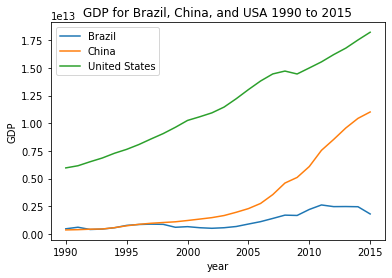

In [6]:
# visualize the results with matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

# create a plot for each country
for country in data:
    plt.plot(data[country][0], data[country][1], label=country)

# label the plot
plt.title('GDP for Brazil, China, and USA 1990 to 2015')
plt.legend()
plt.xlabel('year')
plt.ylabel('GDP')
plt.show()

# 练习

这是一个供你尝试的练习，到世界银行数据网站上，找到[这里](https://data.worldbank.org/indicator)，找到 `Population growth (annual %)`（年人口增长 %）指标。如果点击指标链接，你将在 Web URL 中看到指标的符号（提示：以“SP”开头）。

使用 requests 库，查找 2013、2014、2015 年中国和印度的指标值，将结果放入以下格式的字典中：
{country_name: [[2013, 2014, 2015], [value_2013, value_2014, value_2015]]}


In [7]:
# possible solution for the API exercise
payload = {'format': 'json', 'per_page': '500', 'date':'2013:2016'}
r = requests.get('http://api.worldbank.org/v2/countries/in;cn/indicators/SP.POP.GROW', params=payload)

# clean the data and put it in a dictionary
data = defaultdict(list)
for entry in r.json()[1]:
    # check if country is already in dictionary. If so, append the new x and y values to the lists
    if data[entry['country']['value']]:
        data[entry['country']['value']][0].append(int(entry['date']))
        data[entry['country']['value']][1].append(float(entry['value']))       
    else: # if country not in dictionary, then initialize the lists that will hold the x and y values
        data[entry['country']['value']] = [[],[]] 

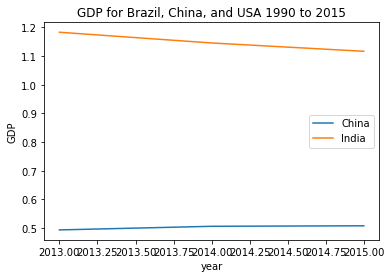

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline 

# create a plot for each country
for country in data:
    plt.plot(data[country][0], data[country][1], label=country)

# label the plot
plt.title('Population growth (annual%)')
plt.legend()
plt.xlabel('year')
plt.ylabel('GDP')
plt.show()